In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
elements = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elements.csv')
flags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flags.csv')
items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/items.csv')
units = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/units.csv')
production_europe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Production_Crops_E_Europe.csv')
production_oceania = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Production_Crops_E_Oceania.csv')
fao_metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01-fao-metadata.csv')
production_africa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Production_Crops_E_Africa.csv', encoding='latin1')
production_americas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Production_Crops_E_Americas.csv', encoding='latin-1')
production_asia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Production_Crops_E_Asia.csv')


**What are the available crops in the dataset?**

In [2]:
# Display unique crop items
unique_items = items['Item'].unique()
print("Unique Crops:")
print(unique_items)


Unique Crops:
['Cereals excluding rice' 'Eggs, hen, in shell' 'Meat, buffalo' ...
 'Animals live nes' 'Animals, live, non-food' 'Live Animals']


**How can we preprocess the data for Polynomial Regression?**

In [3]:
# Assuming you want to predict crop yields, select relevant columns
selected_columns = ['Area', 'Item', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966',
                     'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976',
                     'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986',
                     'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
                     'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006',
                     'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016',
                     'Y2017', 'Y2018', 'Y2019']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_africa = production_africa[selected_columns].copy()

# Handle missing values if necessary
data_africa.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data_africa.drop(['Area', 'Item', 'Element', 'Unit'], axis=1)
y = data_africa['Y2019']  # Assuming you want to predict yields for 2019

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**How can we apply Polynomial Regression to the dataset?**

In [4]:
# Import necessary modules
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create and fit the polynomial regression model
degree = 2  # Adjust the degree as needed
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**How can we evaluate the performance of the Polynomial Regression model?**

Mean Squared Error: 12683916634.537807


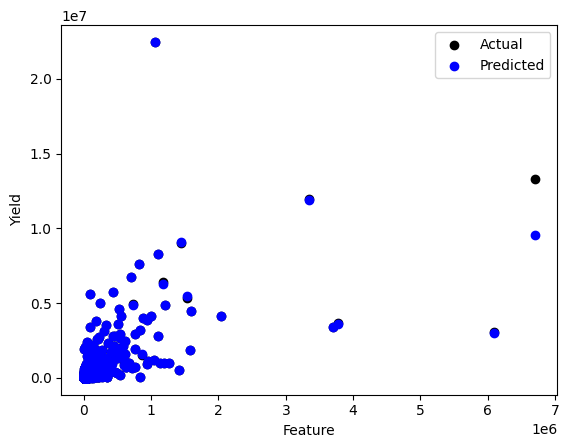

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the predictions against the actual values
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='blue', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Yield')
plt.legend()
plt.show()


**Can we visualize the residuals of the Polynomial Regression model?**

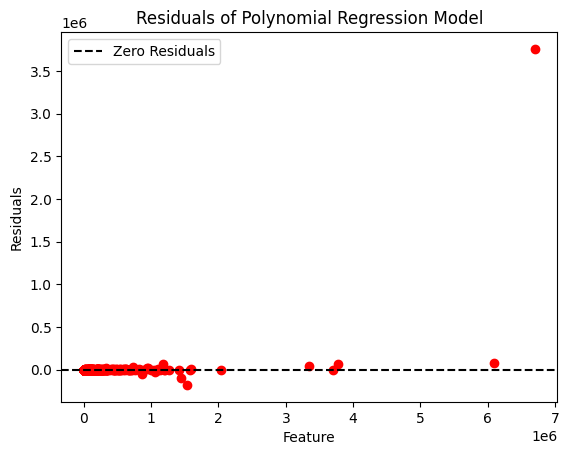

In [6]:
# Calculate residuals
residuals = y_test - y_pred

# Visualize the residuals
plt.scatter(X_test.iloc[:, 0], residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
plt.xlabel('Feature')
plt.ylabel('Residuals')
plt.title('Residuals of Polynomial Regression Model')
plt.legend()
plt.show()


**How can we visualize the overall performance of the Polynomial Regression model?**

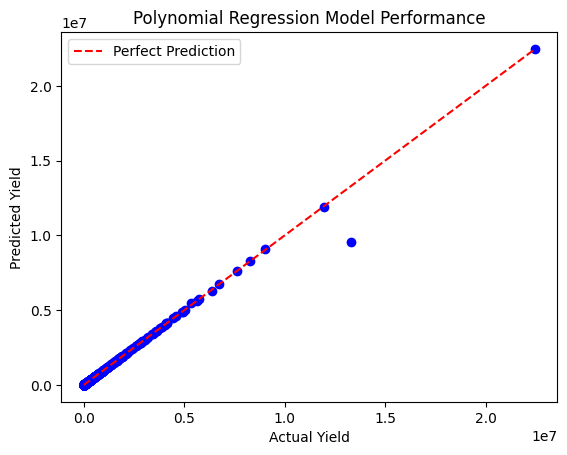

In [7]:
# Visualize the predicted vs. actual values for the entire dataset
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Polynomial Regression Model Performance')
plt.legend()
plt.show()


**How can we visualize the distribution of crop yields?**

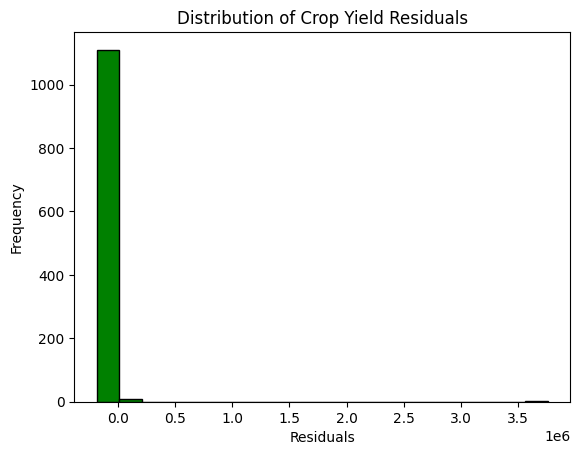

In [8]:
# Visualize the distribution of crop yields
plt.hist(y_test - y_pred, bins=20, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Yield Residuals')
plt.show()


**Visualize the distribution of 'Element' values**

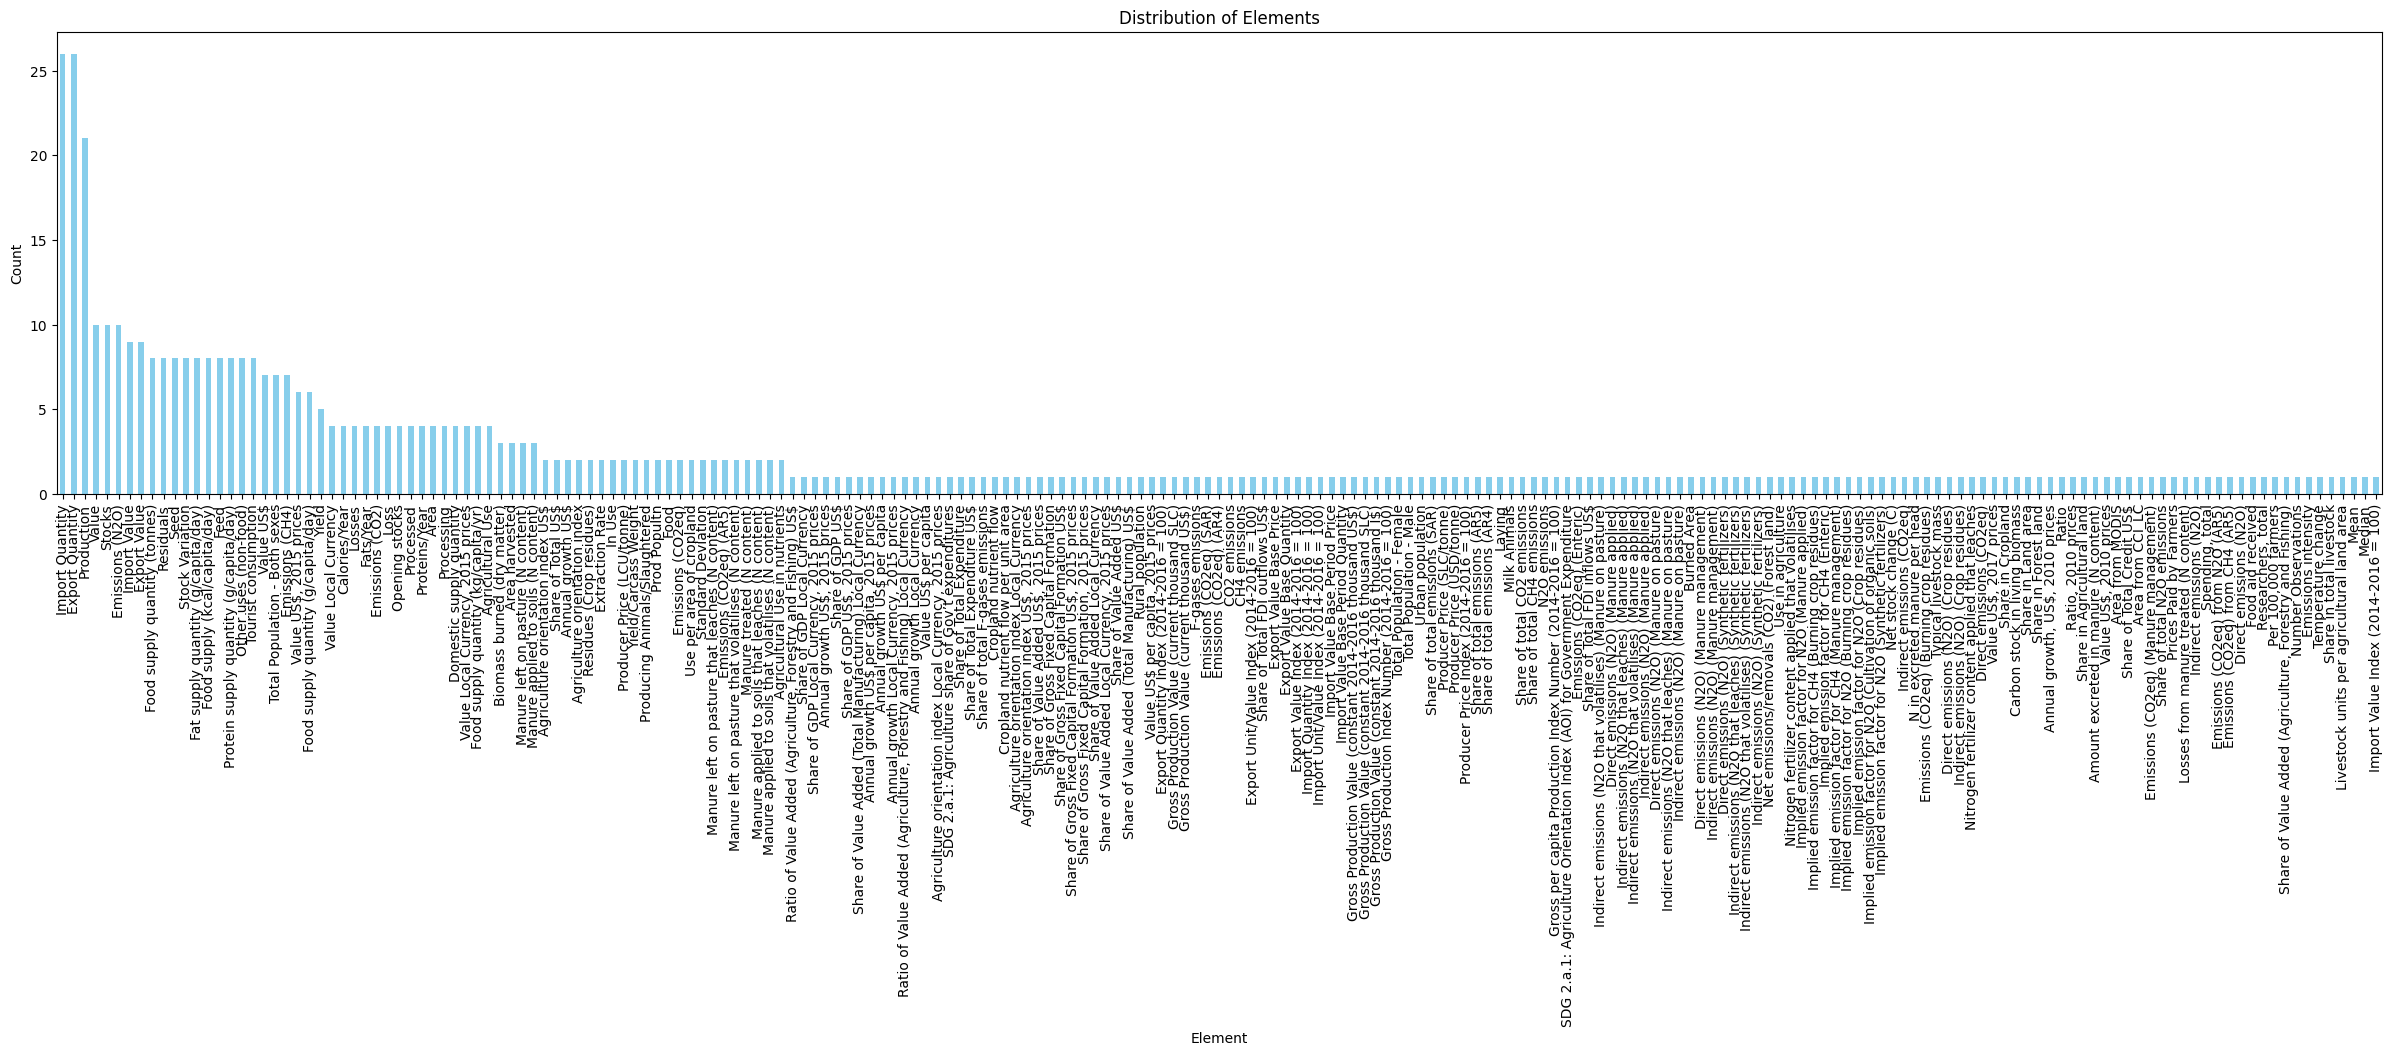

In [9]:
plt.figure(figsize=(30, 6))
elements['Element'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Distribution of Elements')
plt.show()

**Can we explore the flags used in the dataset?**

Flags Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Flag    28 non-null     object
 1   Flags   30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes
None


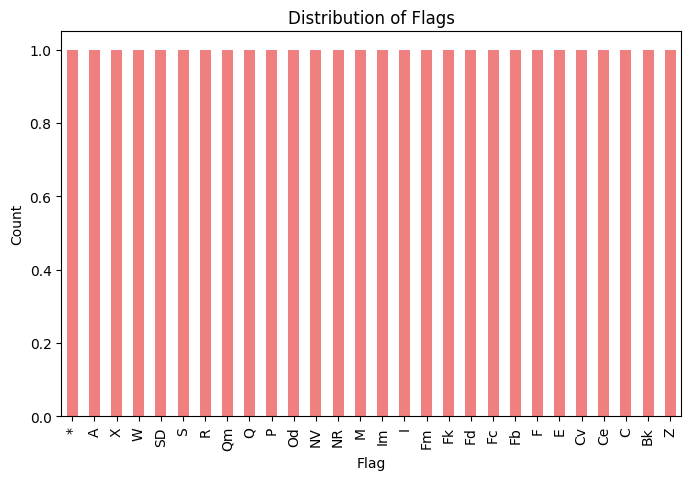

In [10]:
# Display information about the "flags.csv" file
print("Flags Information:")
print(flags.info())

# Visualize the distribution of flags
plt.figure(figsize=(8, 5))
flags['Flag'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Distribution of Flags')
plt.show()


**What is the distribution of crop production units**

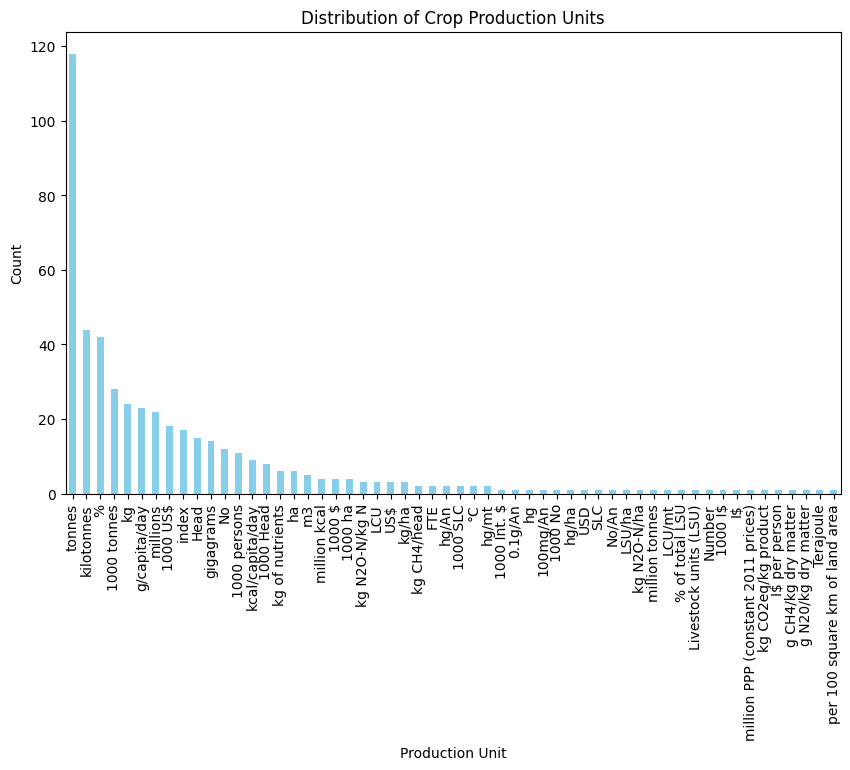

In [11]:
# Visualize the distribution of crop production units
plt.figure(figsize=(10, 6))
elements['Unit'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Production Unit')
plt.ylabel('Count')
plt.title('Distribution of Crop Production Units')
plt.show()


**How can we visualize the distribution of unit names**

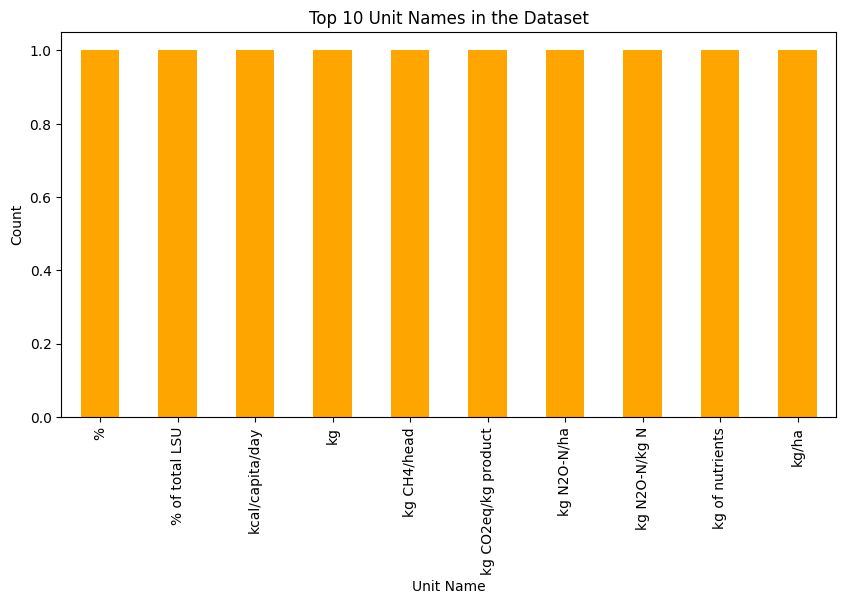

In [12]:
# Visualize the distribution of unit names
plt.figure(figsize=(10, 5))
units['Unit Name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.xlabel('Unit Name')
plt.ylabel('Count')
plt.title('Top 10 Unit Names in the Dataset')
plt.show()


**How can we visualize the production of a specific crop (e.g., 'Maize') over the years in Africa?**

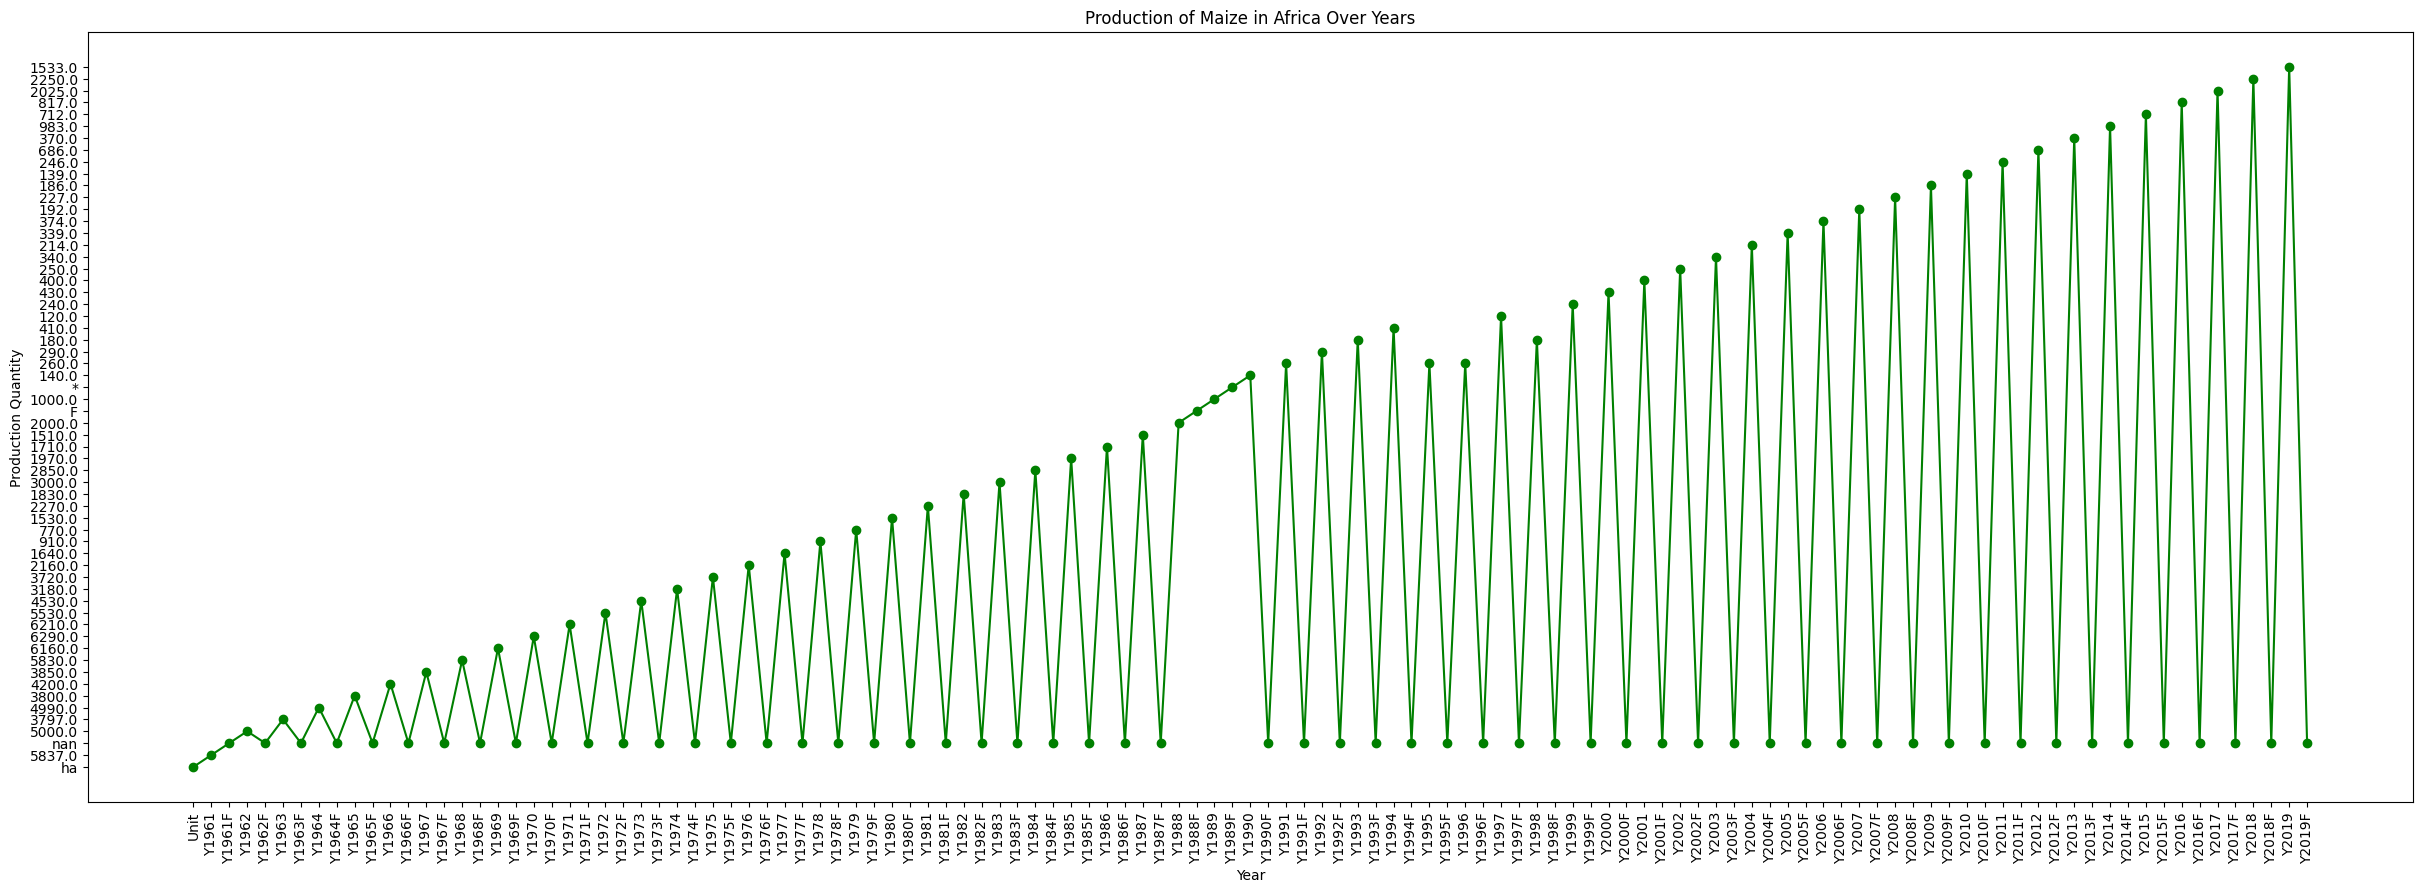

In [15]:
# Define a specific crop, for instance, 'Maize'
specific_crop = 'Maize'

# Assuming you have a DataFrame named 'production_africa'
specific_crop_data = production_africa[production_africa['Item'] == specific_crop]

# Convert column names to strings
years = specific_crop_data.columns[6:].astype(str)

# Convert y-values to strings
production_quantity = specific_crop_data.iloc[0, 6:].astype(str)

# Plotting code
plt.figure(figsize=(30, 10))
plt.plot(years, production_quantity, marker='o', color='green')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Production Quantity')
plt.title(f'Production of {specific_crop} in Africa Over Years')
plt.show()


**How can we visualize the production trend of a specific crop (e.g., 'Rice, paddy') across different regions in Asia?**

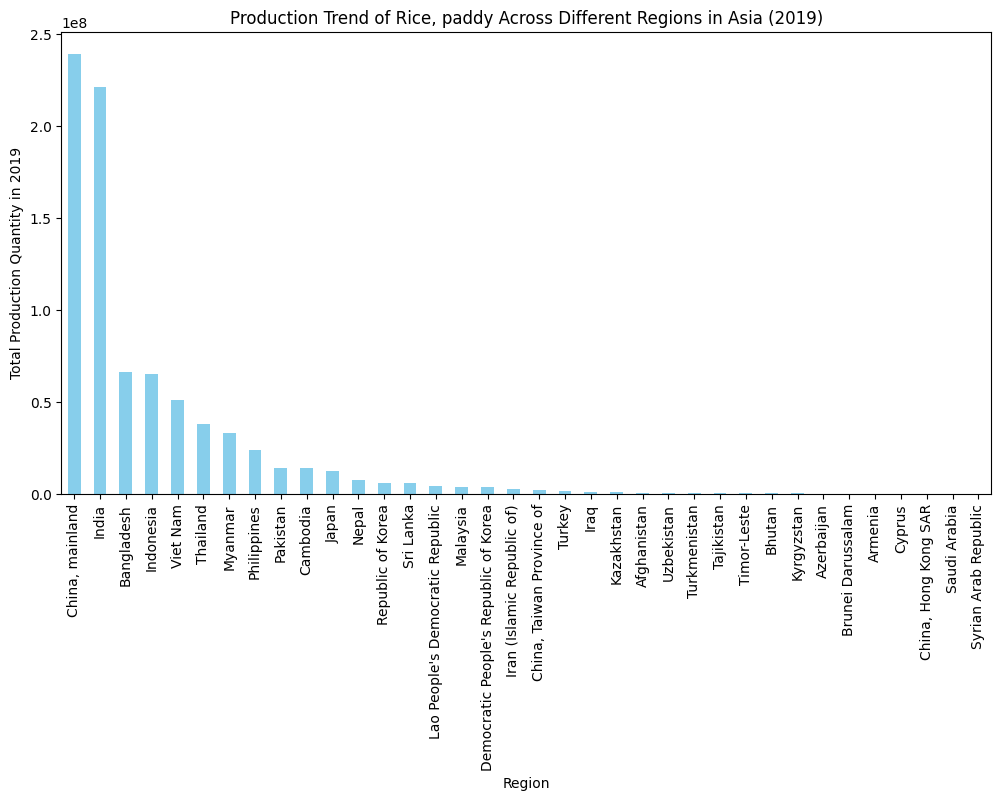

In [16]:
# Select data for a specific crop in Asia
specific_crop_asia = 'Rice, paddy'
specific_crop_data_asia = production_asia[production_asia['Item'] == specific_crop_asia]

# Visualize the production trend of the specific crop across different regions in Asia
specific_crop_data_asia_grouped = specific_crop_data_asia.groupby('Area')['Y2019'].sum().sort_values(ascending=False)
specific_crop_data_asia_grouped.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Total Production Quantity in 2019')
plt.title(f'Production Trend of {specific_crop_asia} Across Different Regions in Asia (2019)')
plt.show()


**How can we visualize the production of specific items (e.g., 'Wheat' and 'Barley') over the years in Europe?**

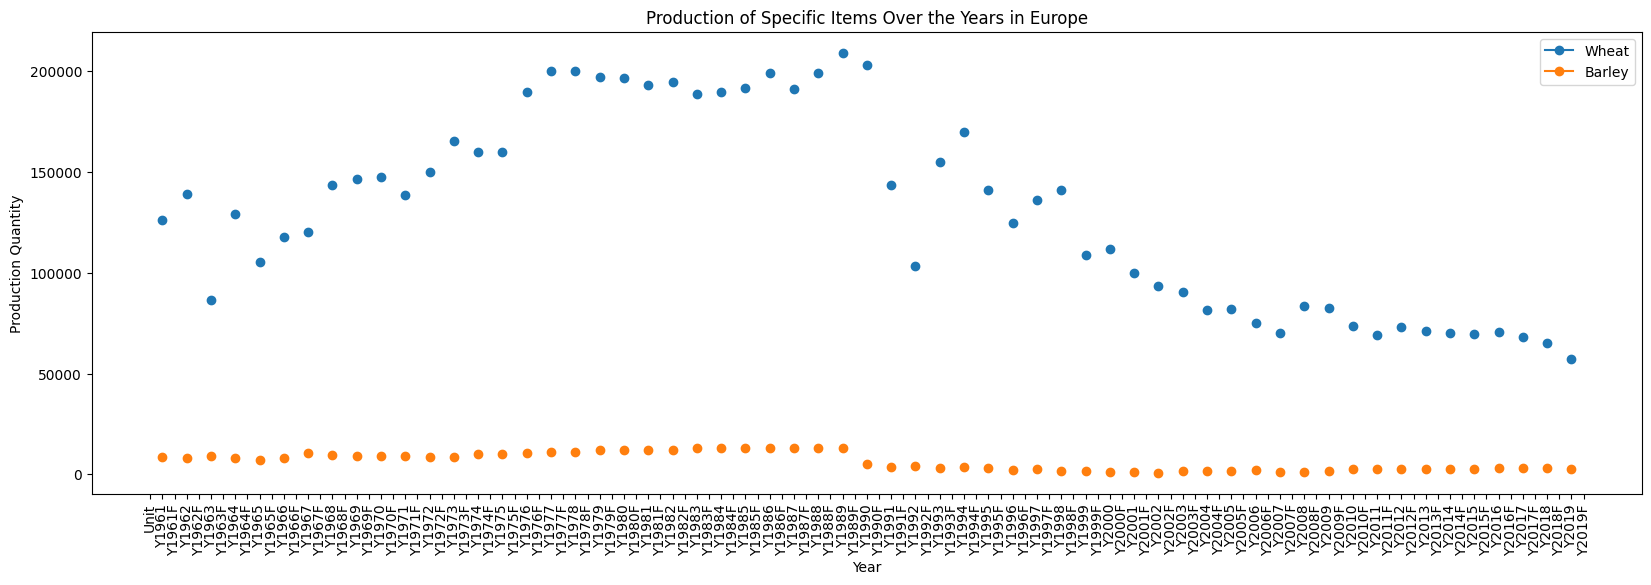

In [21]:
# Define specific_items_data_europe DataFrame
specific_items_data_europe = production_europe

# Assuming you have a list of specific items for Europe
specific_items_europe = ['Wheat', 'Barley']

plt.figure(figsize=(20, 6))
for item in specific_items_europe:
    item_data = specific_items_data_europe[specific_items_data_europe['Item'] == item]

    # Filter out non-numeric values in the 'Production Quantity' column
    production_quantity = item_data.iloc[0, 6:]
    production_quantity_numeric = pd.to_numeric(production_quantity, errors='coerce')

    plt.plot(item_data.columns[6:], production_quantity_numeric, marker='o', label=item)

plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Production Quantity')
plt.title(f'Production of Specific Items Over the Years in Europe')
plt.legend()
plt.show()



**How can we visualize the production distribution for specific items (e.g., 'Tea') in Oceania?**

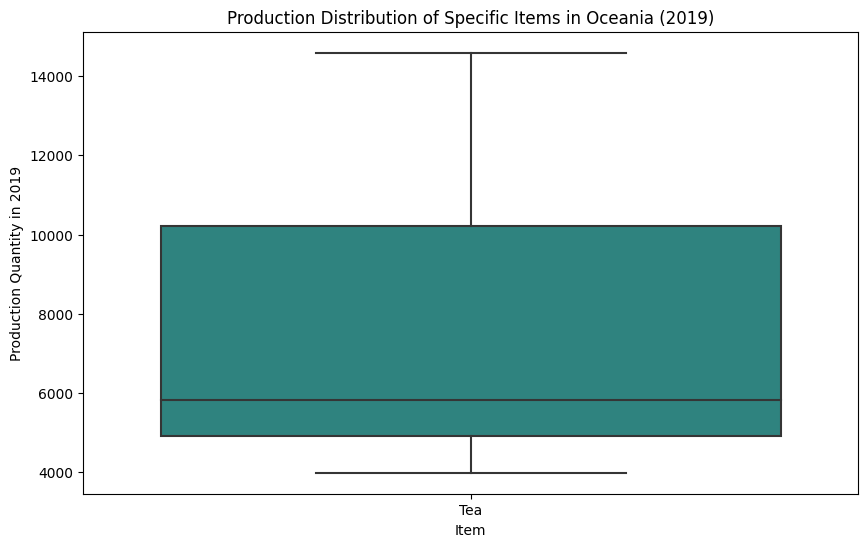

In [23]:
import seaborn as sns
# Select data for specific items in Oceania
specific_items_oceania = ['Tea']
specific_items_data_oceania = production_oceania[production_oceania['Item'].isin(specific_items_oceania)]

# Visualize the production distribution for specific items in Oceania
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Y2019', data=specific_items_data_oceania, palette='viridis')
plt.xlabel('Item')
plt.ylabel('Production Quantity in 2019')
plt.title('Production Distribution of Specific Items in Oceania (2019)')
plt.show()


**How can we visualize the production distribution of major crops (e.g., 'Maize', 'Wheat', 'Rice, paddy') in the Americas?**

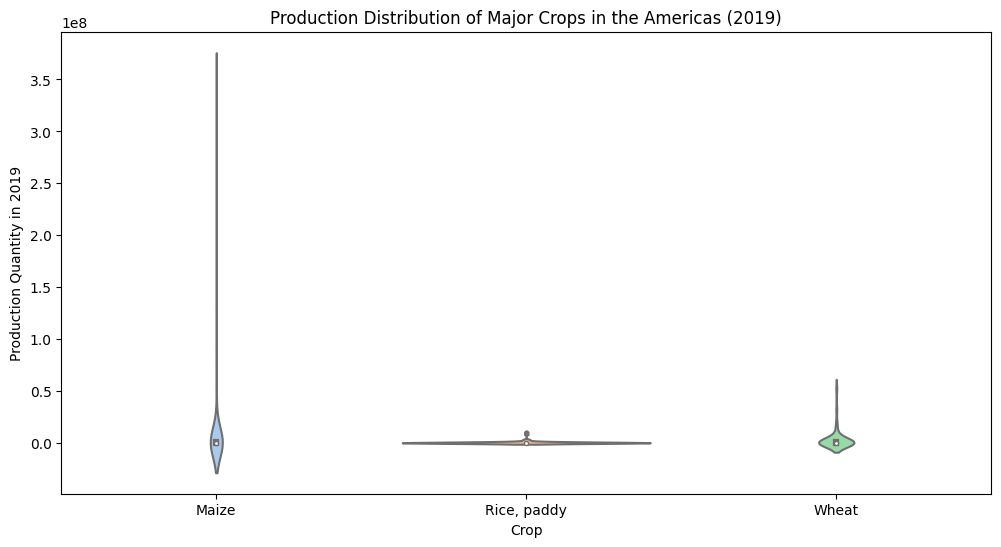

In [24]:
# Select data for major crops in the Americas
major_crops_americas = ['Maize', 'Wheat', 'Rice, paddy']
major_crops_data_americas = production_americas[production_americas['Item'].isin(major_crops_americas)]

# Visualize the production distribution of major crops in the Americas
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item', y='Y2019', data=major_crops_data_americas, palette='pastel')
plt.xlabel('Crop')
plt.ylabel('Production Quantity in 2019')
plt.title('Production Distribution of Major Crops in the Americas (2019)')
plt.show()


**How can we visualize the yield trends for different crops in Asia?**

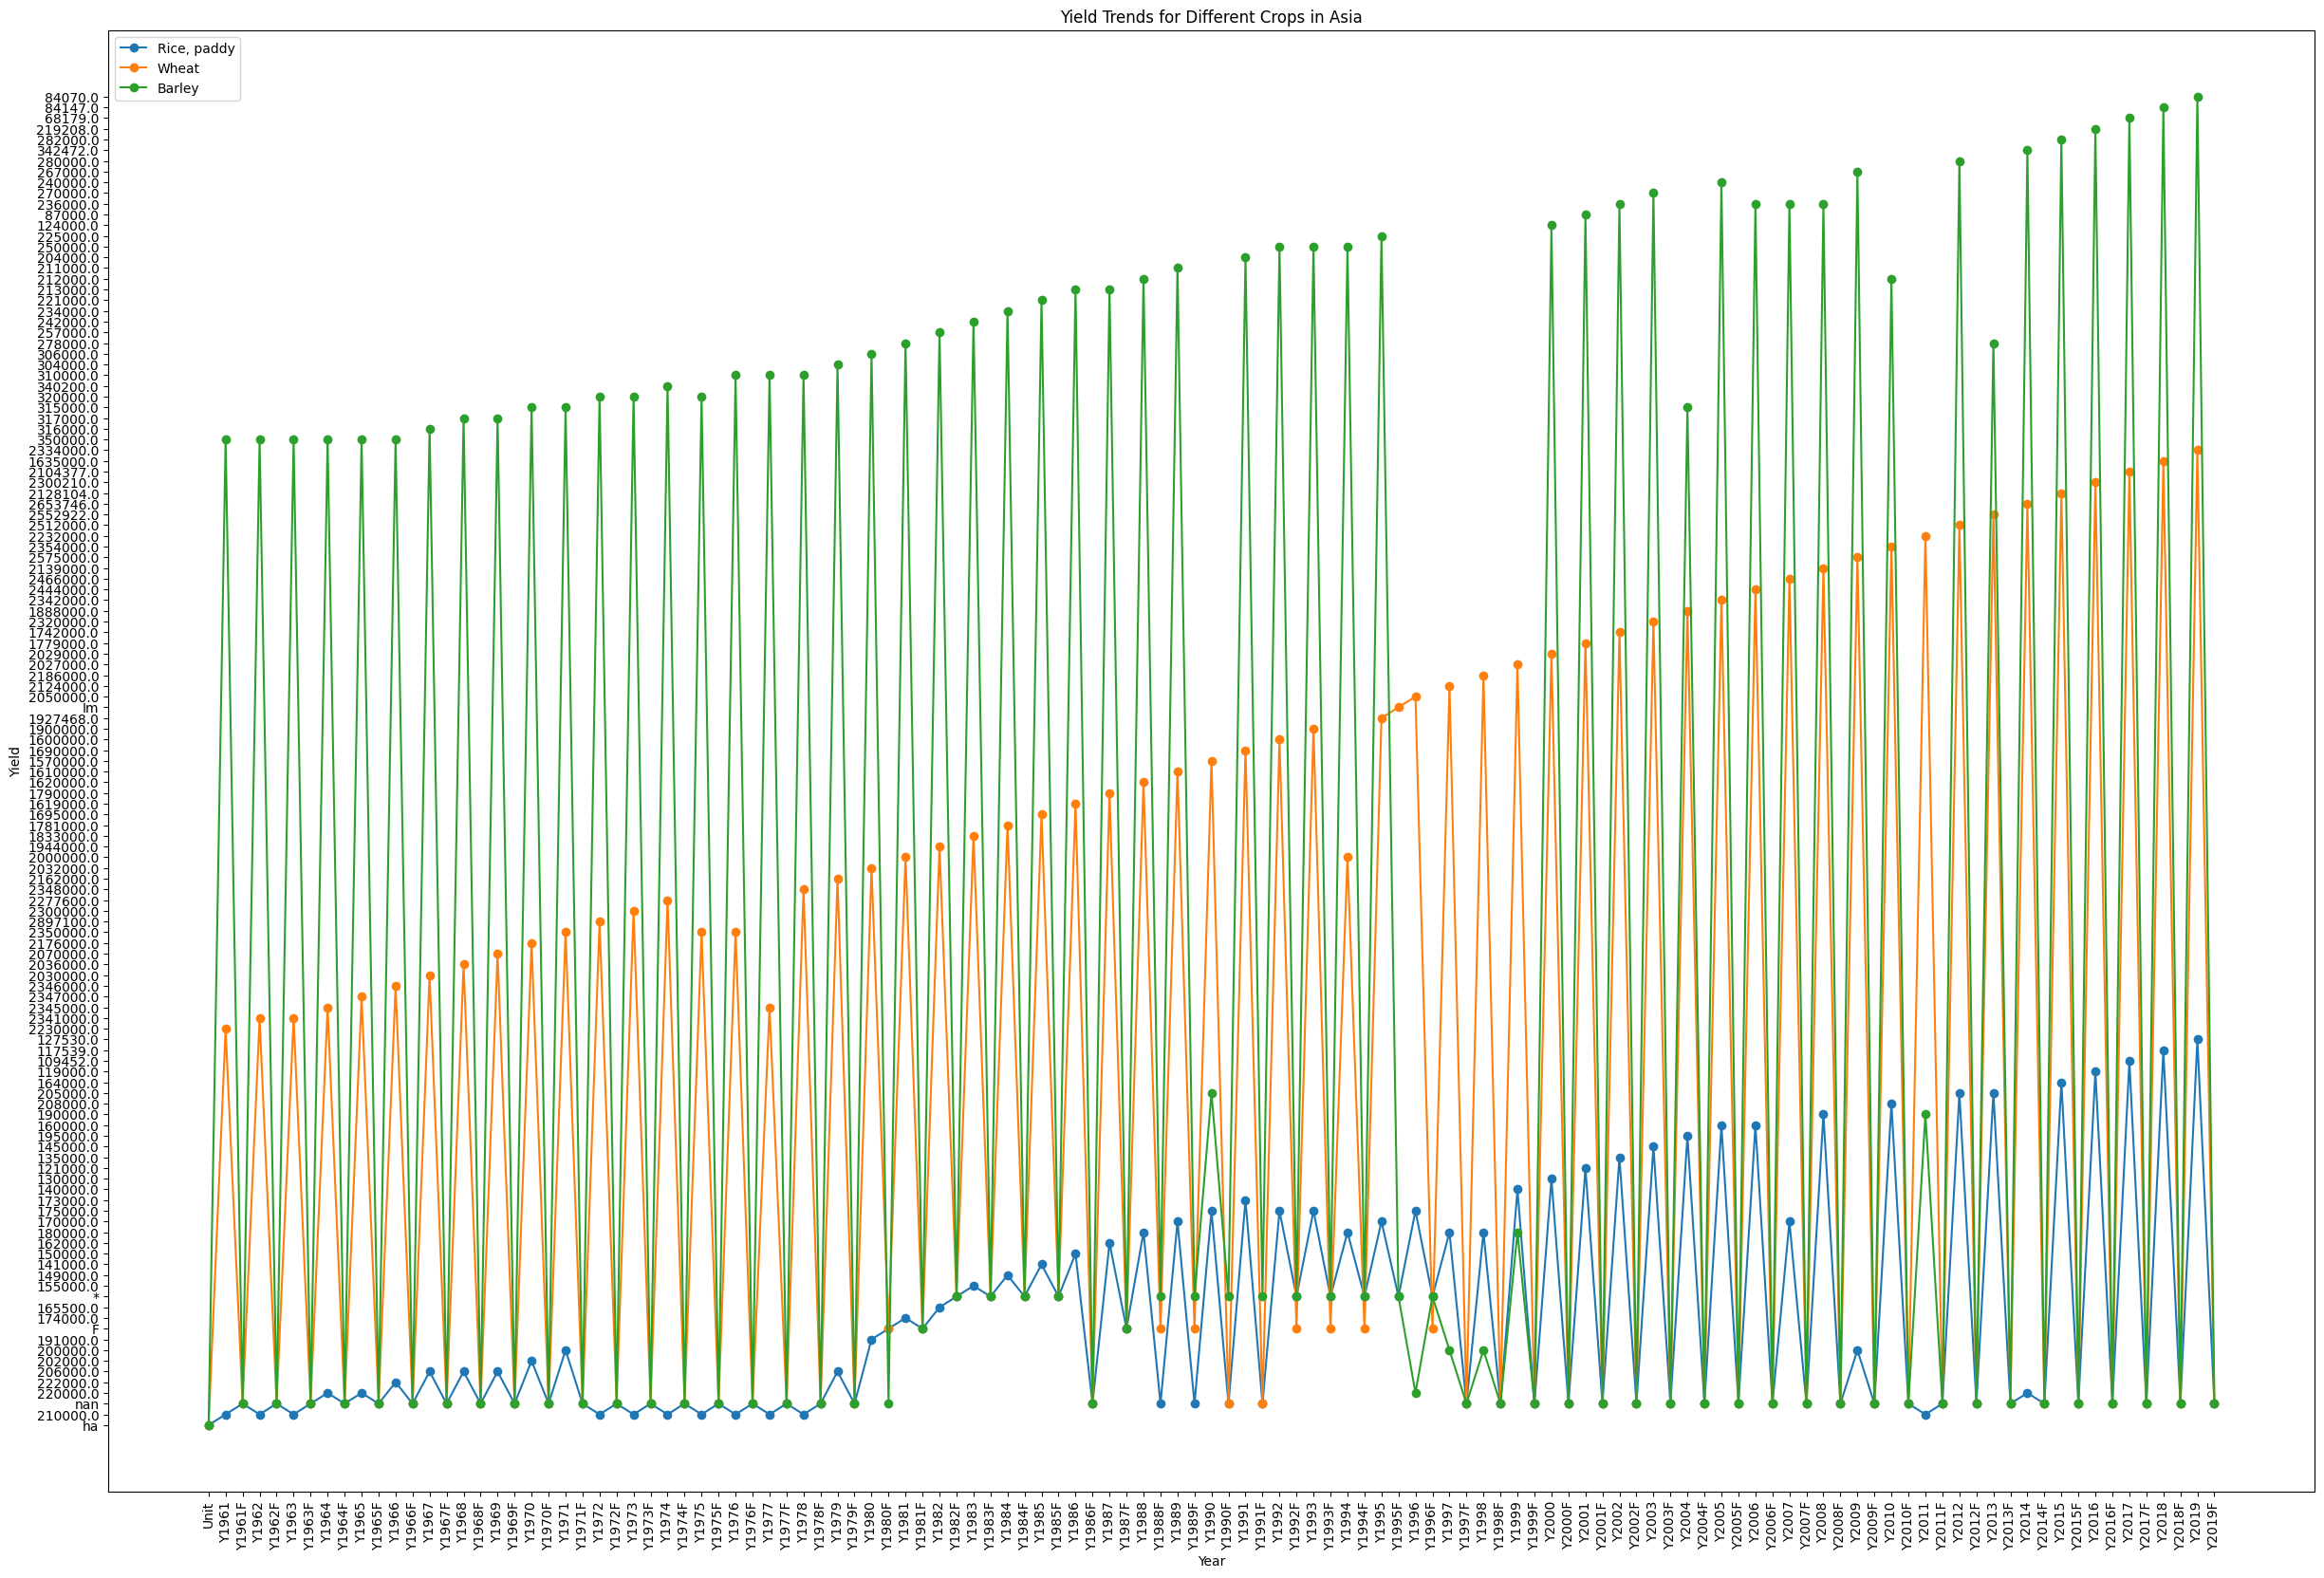

In [25]:
import matplotlib.pyplot as plt

# Assuming you have the necessary data loaded in the 'production_asia' DataFrame

# Select data for yield trends of different crops in Asia
crops_asia_yield = ['Rice, paddy', 'Wheat', 'Barley']
crops_data_asia_yield = production_asia[production_asia['Item'].isin(crops_asia_yield)]

# Visualize the yield trends for different crops in Asia
plt.figure(figsize=(30, 20))
for crop in crops_asia_yield:
    crop_data_yield = crops_data_asia_yield[crops_data_asia_yield['Item'] == crop]
    years = crop_data_yield.columns[6:].astype(str)  # Convert column names to strings
    values = crop_data_yield.iloc[0, 6:].astype(str).values  # Convert values to strings
    plt.plot(years, values, marker='o', label=crop)

plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Yield')
plt.title('Yield Trends for Different Crops in Asia')
plt.legend()
plt.show()


**can we visualize the production trends for specific items (e.g., 'Bananas', 'Oranges', 'Apples') in Europe?**

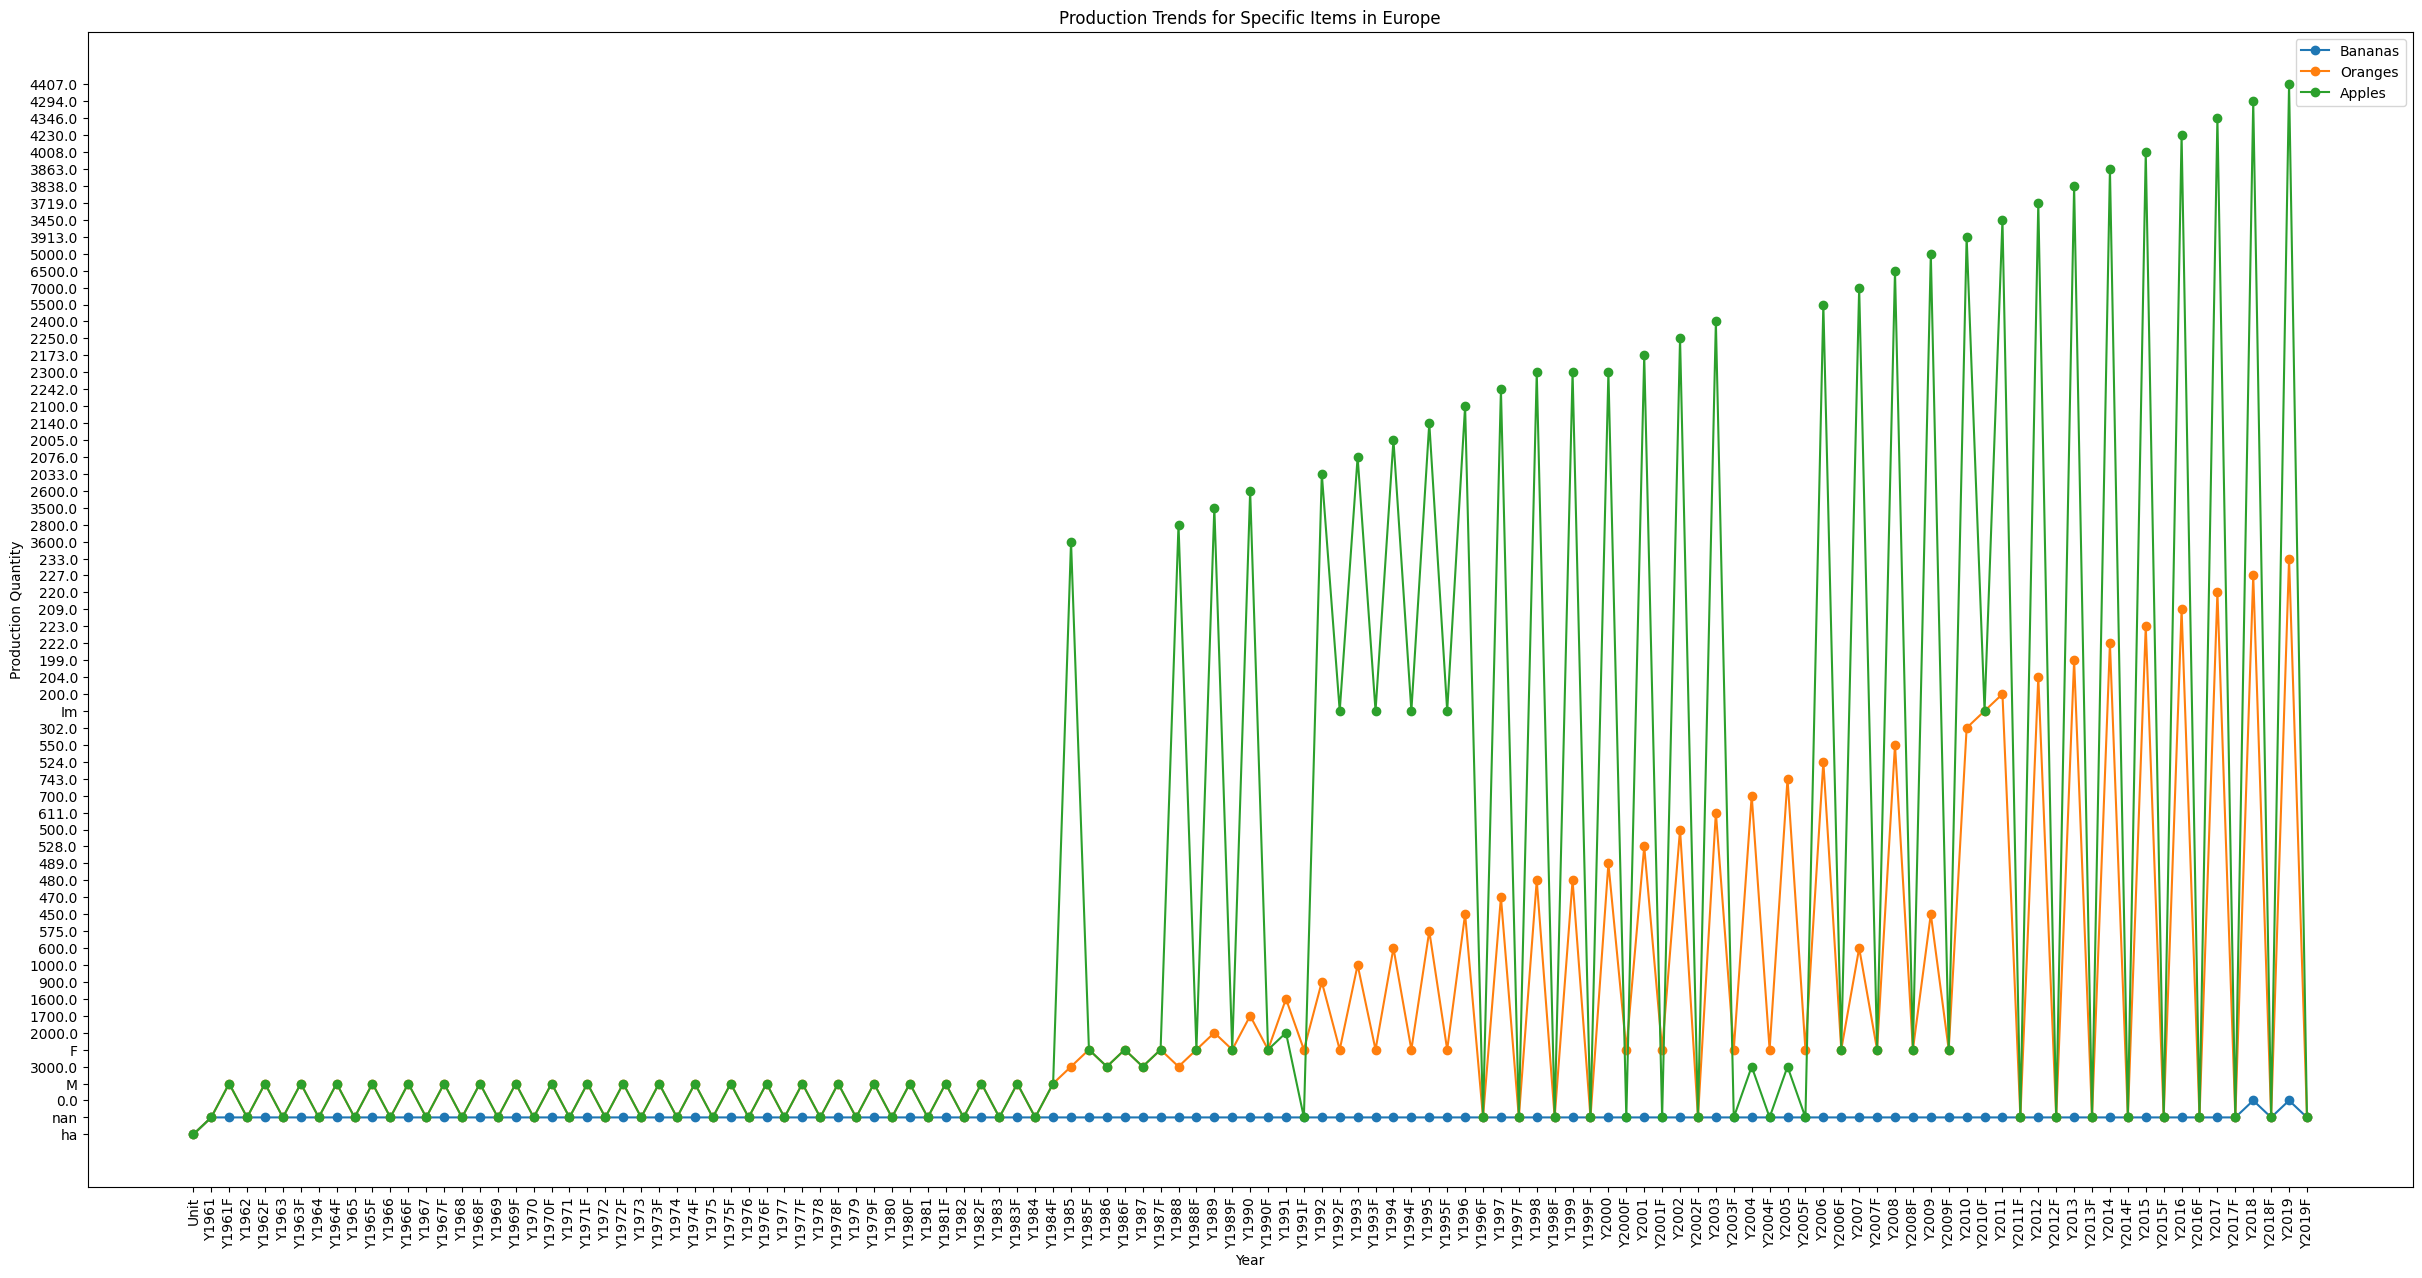

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the necessary data loaded in the 'production_europe' DataFrame

# Select data for production trends of specific items in Europe
specific_items_europe_trends = ['Bananas', 'Oranges', 'Apples']
specific_items_data_europe_trends = production_europe[production_europe['Item'].isin(specific_items_europe_trends)]

# Visualize the production trends for specific items in Europe
plt.figure(figsize=(30, 15))
for item in specific_items_europe_trends:
    item_data_trends = specific_items_data_europe_trends[specific_items_data_europe_trends['Item'] == item]
    years = item_data_trends.columns[6:].astype(str)  # Convert column names to strings
    values = item_data_trends.iloc[0, 6:].astype(str).values  # Convert values to strings
    plt.plot(years, values, marker='o', label=item)

plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Production Quantity')
plt.title('Production Trends for Specific Items in Europe')
plt.legend()
plt.show()

